In [66]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
#from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [35]:
Url = "https://raw.githubusercontent.com/BigDataGal/Python-for-Data-Science/master/titanic-train.csv"

In [36]:
titanic = pd.read_csv(Url)

In [37]:
titanic.columns =['PassengerId','Survived','Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']

In [38]:
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


You use only Pclass, Sex, Age, SibSp (Siblings aboard), Parch
(Parents/children aboard), and Fare to predict whether a passenger
survived.


In [39]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [40]:
titanic.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1,inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [41]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
titanic.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [43]:
titanic.shape

(891, 7)

Age has 177 null values. Lets the distribution of the age in order to get an idea on how to fill the missing values

<AxesSubplot:xlabel='Age', ylabel='Count'>

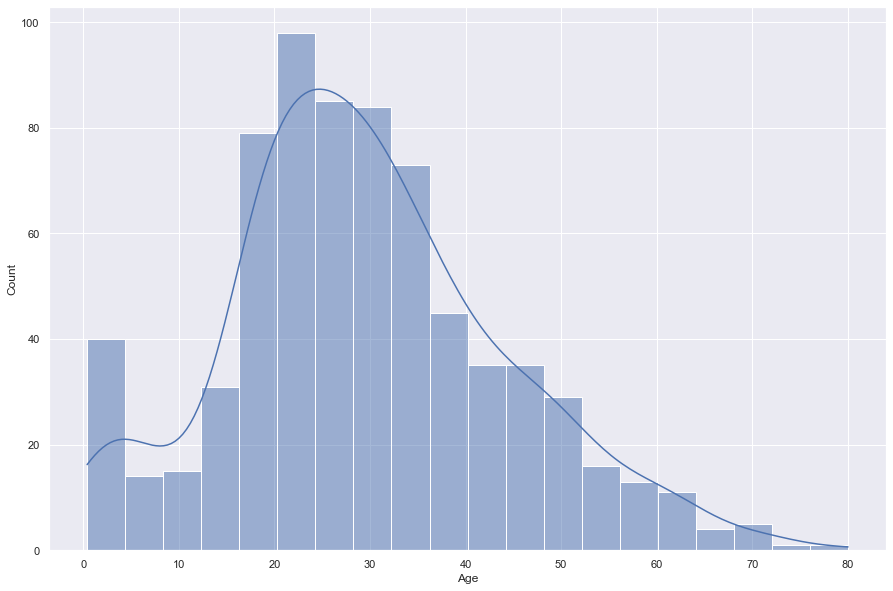

In [44]:
sb.set(rc = {'figure.figsize':(15,10)})
sb.histplot(titanic['Age'],kde=True,bins=20)

In [45]:
titanic['Age'].median()

28.0

Median of Aage is 28 and juding by the distrubution, its better to fill the missing values with Median

In [46]:
titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())

Now lets split Data into X and Y

In [47]:
X=titanic.drop("Survived",axis=1)
Y=titanic['Survived']

In [48]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,male,22.0,1,0,7.2500
1,1,female,38.0,1,0,71.2833
2,3,female,26.0,0,0,7.9250
3,1,female,35.0,1,0,53.1000
4,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000
887,1,female,19.0,0,0,30.0000
888,3,female,28.0,1,2,23.4500
889,1,male,26.0,0,0,30.0000


Since Sex is categorical variable, lets deal with it

In [33]:
X = pd.get_dummies(X.Sex, prefix='Gender')
print(X.head())

   Gender_female  Gender_male
0              0            1
1              1            0
2              1            0
3              1            0
4              0            1


In [50]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(titanic['Sex'], prefix='Gender')#.iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
X_new = pd.concat([X, area_dummies], axis=1)
X_new.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Gender_female,Gender_male
0,3,male,22.0,1,0,7.2500,0,1
1,1,female,38.0,1,0,71.2833,1,0
2,3,female,26.0,0,0,7.9250,1,0
3,1,female,35.0,1,0,53.1000,1,0
4,3,male,35.0,0,0,8.0500,0,1


In [52]:
X_new.drop('Sex',axis=1,inplace=True)
X_new.head()

,Pclass,Age,SibSp,Parch,Fare,Gender_female,Gender_male
0,3,22.0,1,0,7.2500,0,1
1,1,38.0,1,0,71.2833,1,0
2,3,26.0,0,0,7.9250,1,0
3,1,35.0,1,0,53.1000,1,0
4,3,35.0,0,0,8.0500,0,1


In [53]:
#splitting data into train and test
x_train,x_test,y_train,y_test = train_test_split(X_new,Y,test_size = 0.30, random_state= 355)

In [56]:
#let's first visualize the tree on the data without doing any pre processing
clf = DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [57]:
feature_name=list(X_new.columns)
class_name = list(y_train.unique())
feature_name

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Gender_female', 'Gender_male']

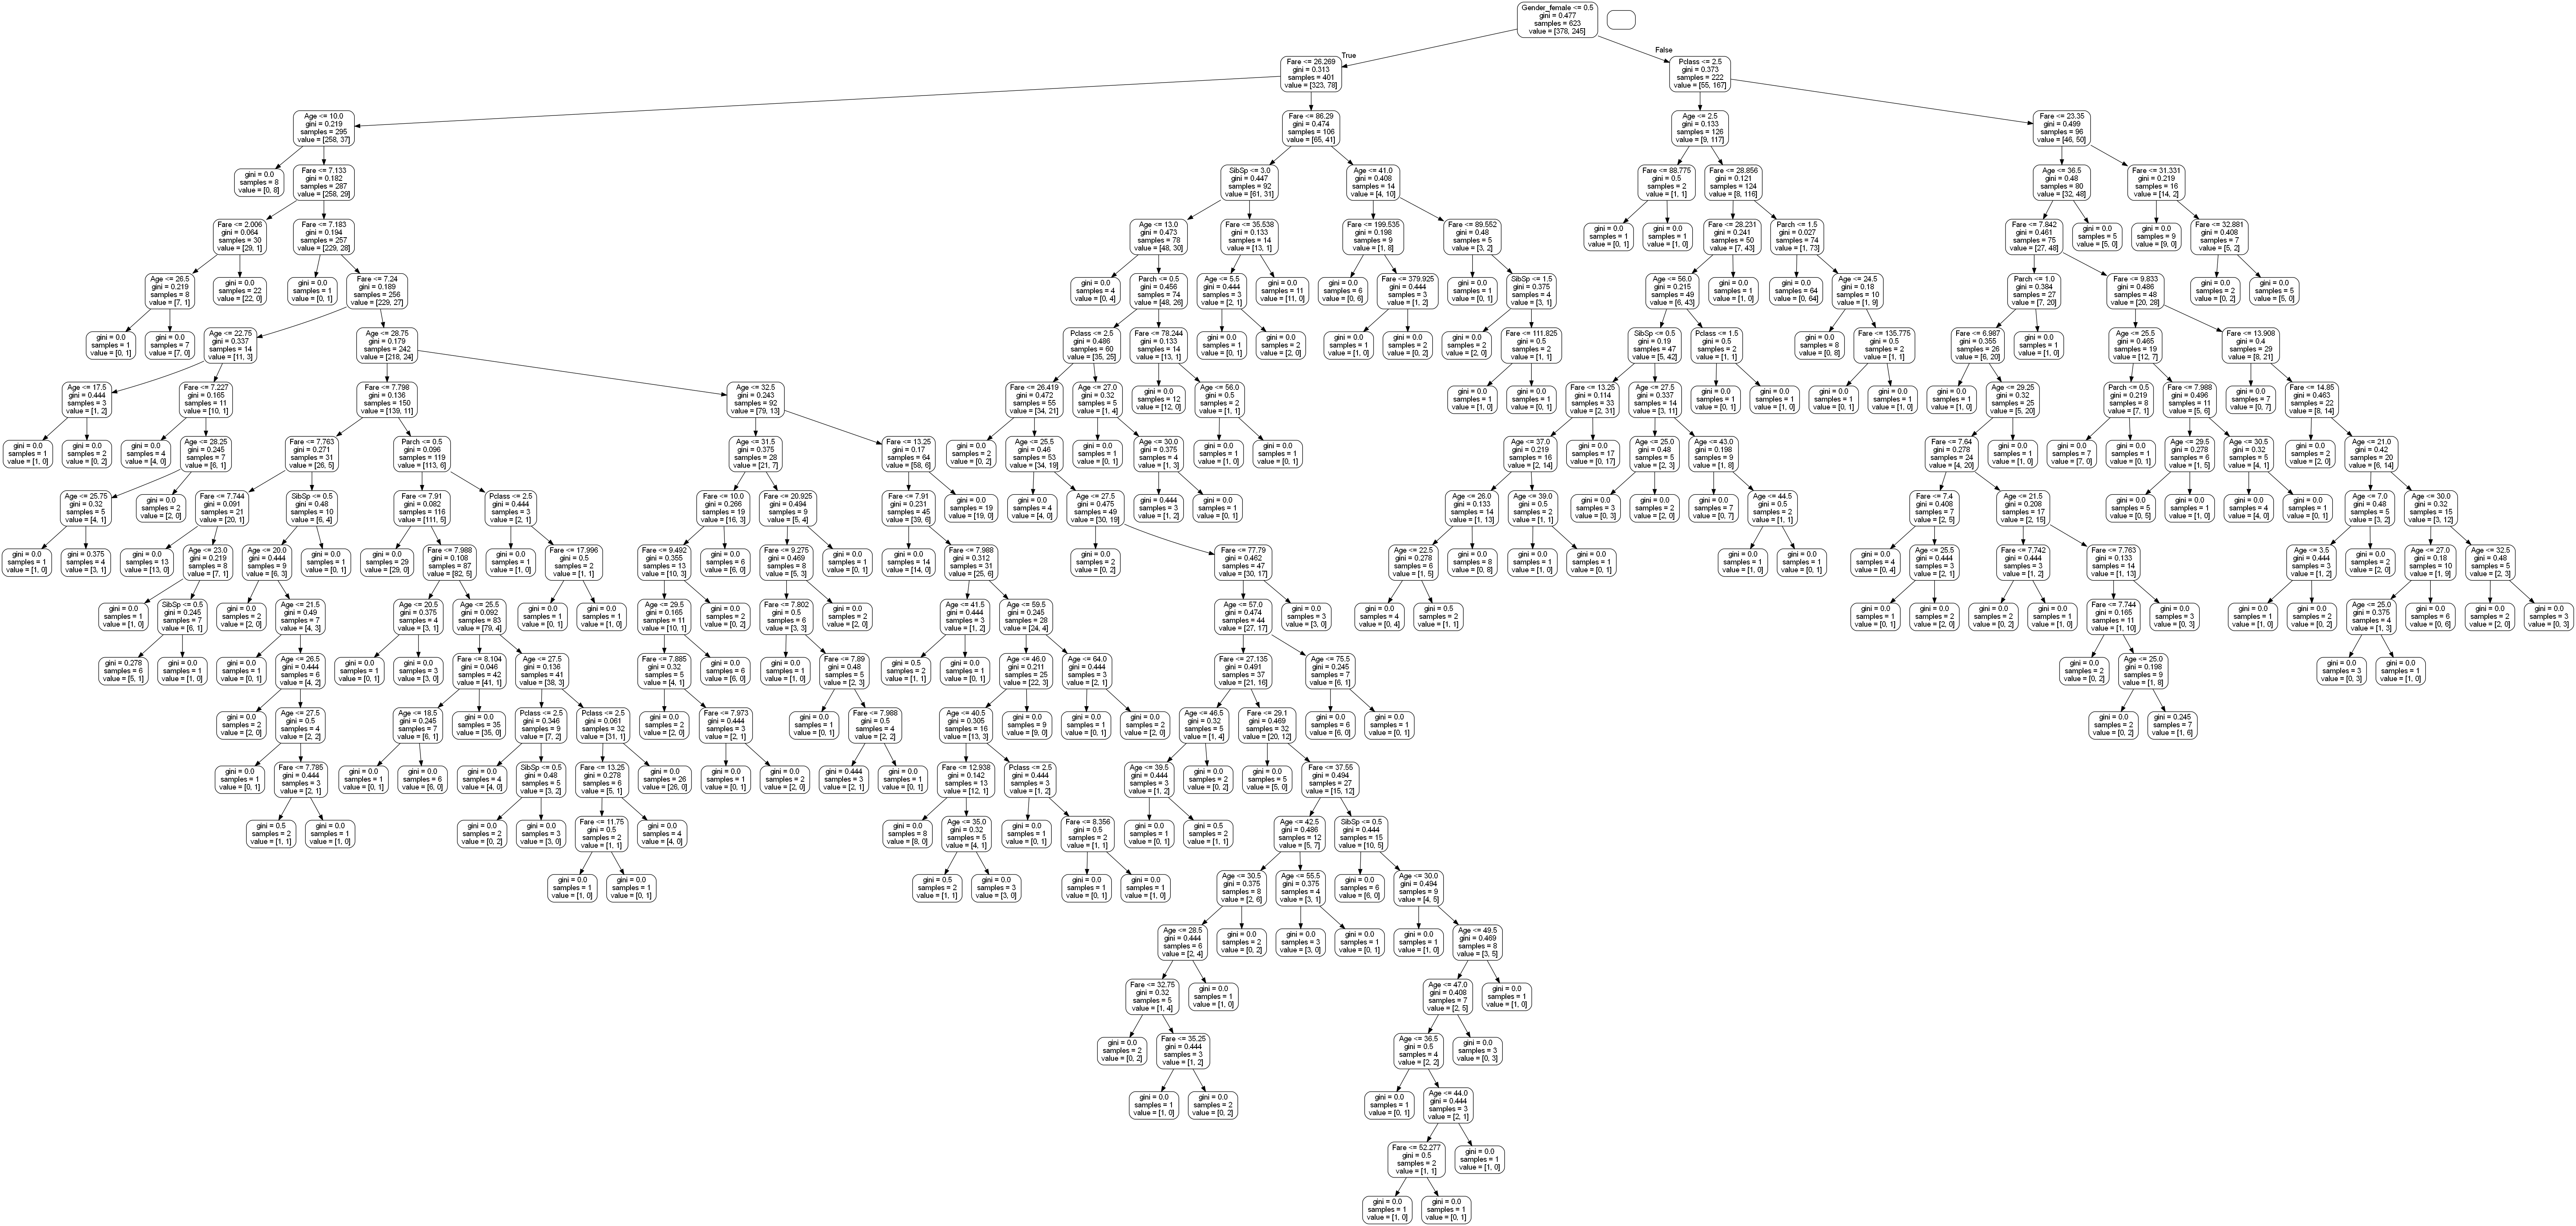

In [60]:
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,feature_names = feature_name,rounded = True,filled = False)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("titanic_tree.png")
# Show graph
Image(graph.create_png())

In [61]:
clf.score(x_train,y_train)

0.9839486356340289

In [62]:
py_pred = clf.predict(x_test)

In [63]:
# accuracy of our classification tree
clf.score(x_test,y_test)

0.746268656716418

Hyperparameter tuning

In [69]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,10,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    
}

In [70]:
grid_search = GridSearchCV(estimator=clf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [71]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(2, 10)})

In [72]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 6}


In [73]:
grid_search.best_score_

0.8138193548387097

In [74]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =4, min_samples_leaf= 1, min_samples_split= 6)
clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=6)

In [75]:
clf.score(x_test,y_test)

0.8059701492537313

Great!! Our test score has improved after using Gridsearch. Previously it was 74% and now it it is at 80%

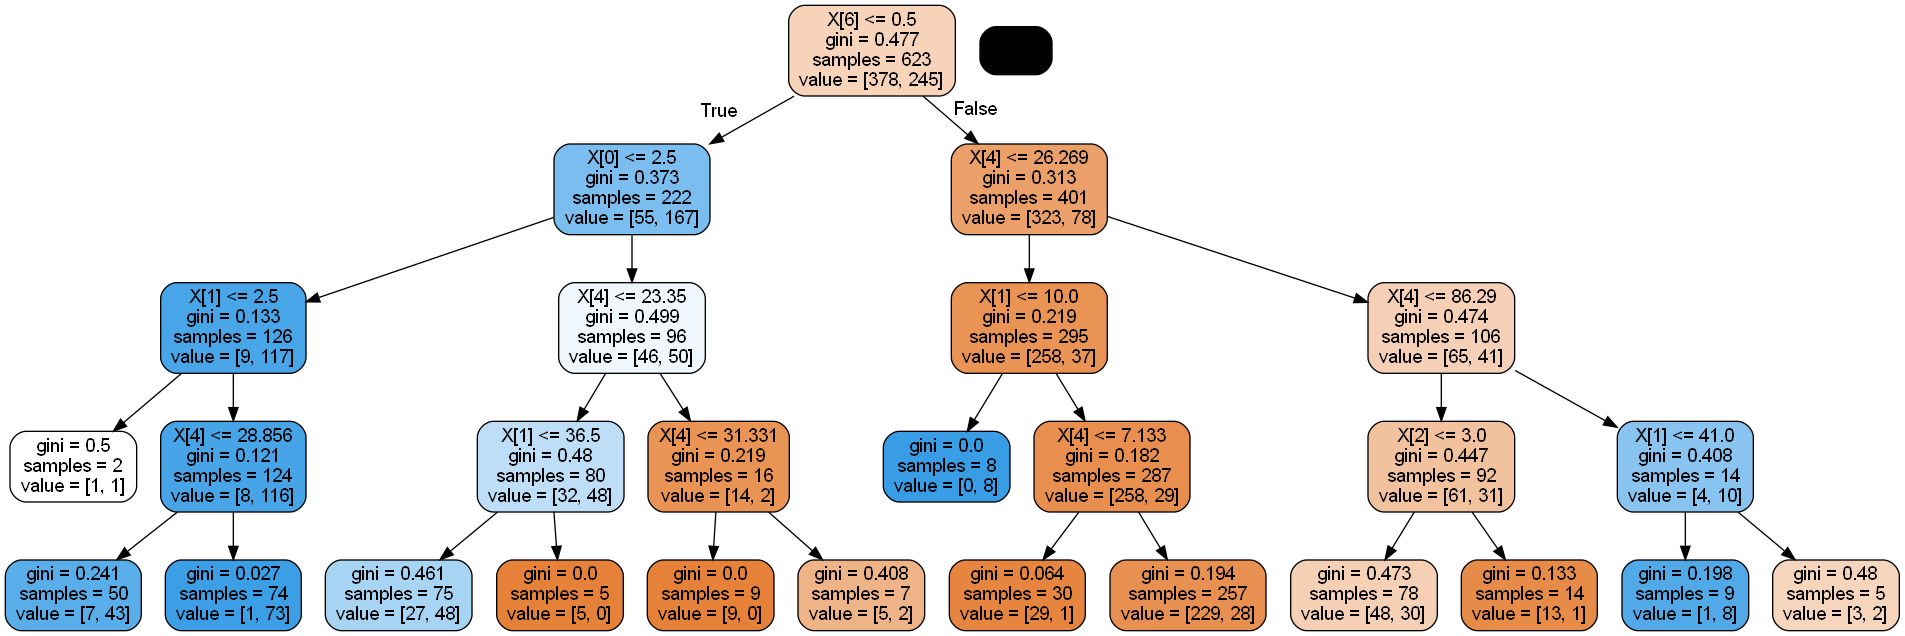

In [76]:
feature_name=list(X.columns)
class_name = list(y_train.unique())
# create a dot_file which stores the tree structure
dot_data = export_graphviz(clf,rounded = True,filled = True)
# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)  
graph.write_png("Titanic_tree_after_tuning.png")
# Show graph
Image(graph.create_png())